In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from numpy import random

In [3]:
X = np.array([[5,3],
    [10,15],
    [15,12],
    [24,10],
    [30,30],
    [60,70],
    [70,80],
    [74,65],
    [80,55],
    [85,91],])

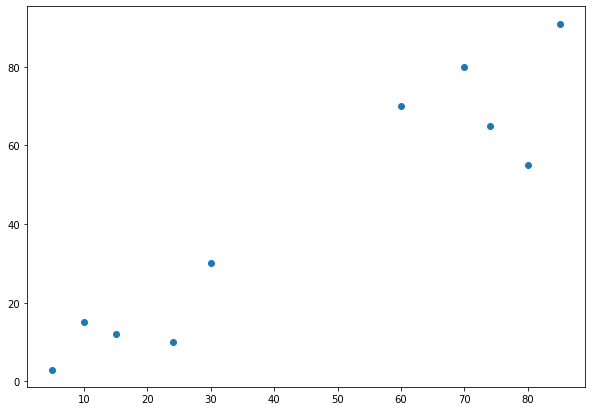

In [4]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0],X[:,1])

In [15]:


def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))


class KMeans:
    def __init__(self, K=2, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # list of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        
#         print(self.clusters)
        
        
        # the centers (mean feature vector) for each cluster
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        # randomly take the k index for centroids
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        
#         print(random_sample_idxs)
        
#         print(self.X[151])
        
        # 
        self.centroids = [self.X[idx] for idx in random_sample_idxs]
        
#         print(self.centroids)

        # Optimize the clusters
        for _ in range(self.max_iters):
            
            
            self.clusters = self.create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self.get_centroids(self.clusters)
            
#             print(self.centroids)

            # check if clusters have changed
            if self.is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # Classify samples as the index of their clusters
        return self.get_cluster_labels(self.clusters)

    
    
    
    def get_cluster_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
        return labels
    
    
    

    def create_clusters(self, centroids):
        # Assign the samples to the closest centroids to create clusters
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
#             print(centroids)

            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
            
        print('-------------')
#         print(clusters)    
        
        return clusters
    
    

    def closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_index = np.argmin(distances)
        return closest_index

    
    
    def get_centroids(self, clusters):
        # assign mean value of clusters to centroids
        centroids = np.zeros((self.K, self.n_features))
        
#         print(centroids)
        
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    
    
    def is_converged(self, centroids_old, centroids):
        # distances between each old and new centroids, fol all centroids
        distances = [
            euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)
        ]
        
        print('distance',distances)
        
        return sum(distances) == 0

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=5)

        plt.show()



-------------


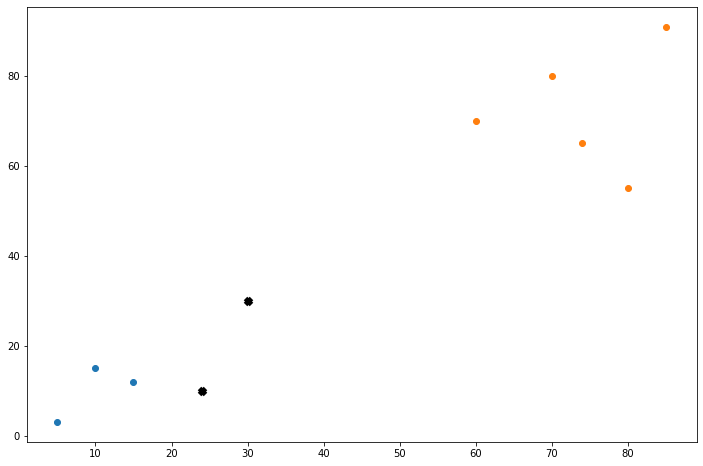

distance [10.5, 50.684755542909]


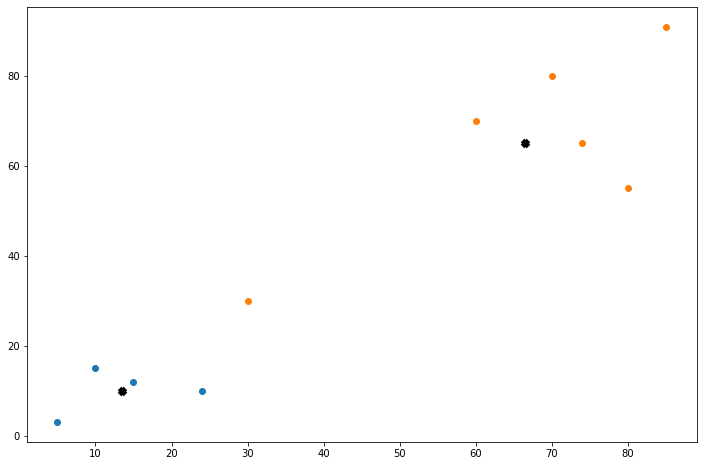

-------------


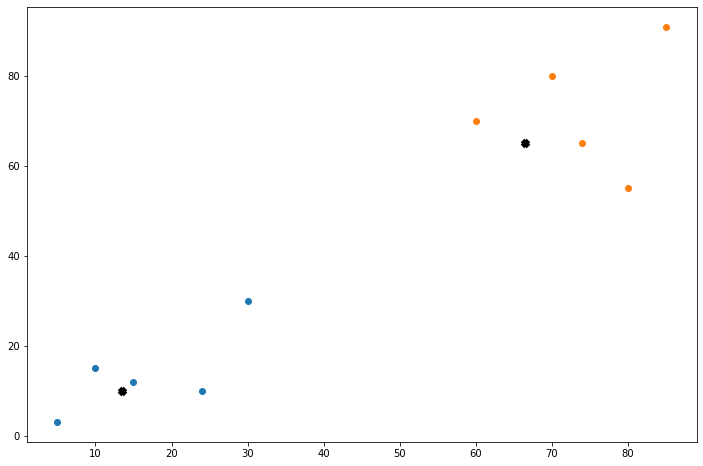

distance [5.18555686498567, 10.136951108581796]


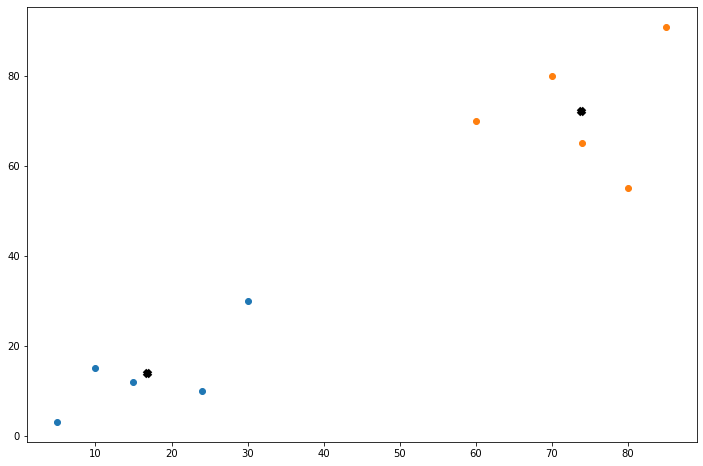

-------------


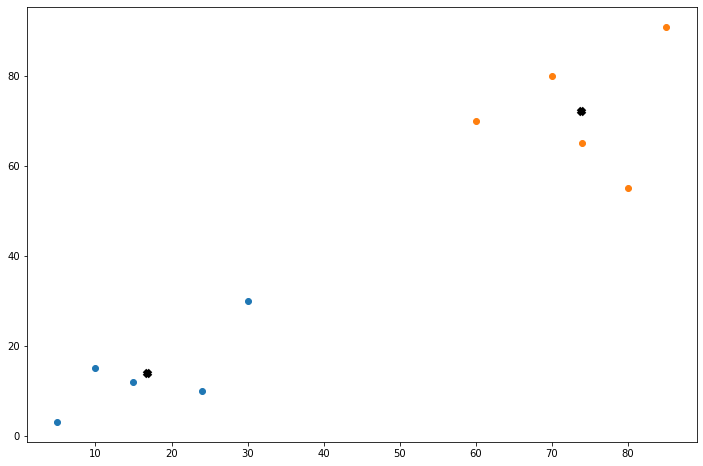

distance [0.0, 0.0]


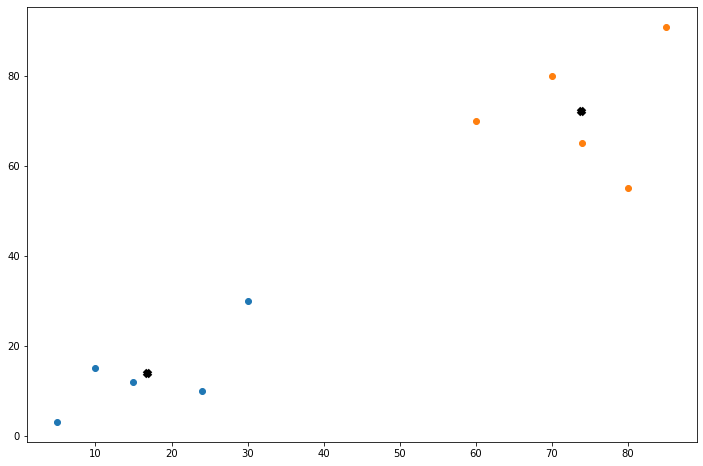

In [16]:

k = KMeans(K=2, max_iters=150, plot_steps=True)
y_pred = k.predict(X)
k.plot()